In [1]:
import sys, os, glob, warnings, logging
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest
from sw_qPCR import *

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in data
df_plate1 = get_plate_data('220627-plate1')
df_plate2 = get_plate_data('220627-plate2')

In [3]:
# Concatenate the data (stacking up and down)
df = pd.concat([df_plate1, df_plate2])
df.reset_index(inplace=True, drop=True)

In [4]:
df

Well   Sample           Primer         Cq
0    A01  C-188-1         Rps29 v1  19.885587
1    A02  C-188-1         Rps29 v1  19.761378
2    A03  C-188-1         Rps29 v1  19.093572
3    A04  A-228-1         Rps29 v1  19.523431
4    A05  A-228-1         Rps29 v1  19.357584
..   ...      ...              ...        ...
144  H07  A-230-1  Serpinh1 sg3 v1  25.925864
145  H08  A-230-2  Serpinh1 sg3 v1  27.106830
146  H09  A-230-3  Serpinh1 sg3 v1  26.207891
147  H10  A-230-4  Serpinh1 sg3 v1  27.055073
148  H11  A-230-5  Serpinh1 sg3 v1  26.586064

[149 rows x 4 columns]

In [5]:
df1 = get_expression_data(df, 'Serpinh1 sg1 v2')

In [6]:
df1

Sample     Cq_ref    Cq_test    deltaCq    relExp  Group
0  A-228-1  19.415490  26.413379   6.997889  0.007824  A-228
1  A-228-2  19.807876  27.562808   7.754932  0.004629  A-228
2  A-228-3  19.887636  26.929450   7.041814  0.007589  A-228
3  A-228-4  19.017956  26.266015   7.248059  0.006578  A-228
4  A-228-5  19.234564  26.425633   7.191069  0.006843  A-228
5  C-188-1  19.580179  24.023792   4.443613  0.045956  C-188
6  C-188-2  25.394857  36.931587  11.536730  0.000337  C-188
7  C-188-3  20.124798  26.484224   6.359426  0.012179  C-188
8  C-188-4  20.347366  26.555863   6.208497  0.013522  C-188
9  C-188-5  20.183725  26.896146   6.712421  0.009536  C-188

In [7]:
df1_filtered = df1[df1.Cq_ref<21]

<AxesSubplot:xlabel='Group', ylabel='relExp'>

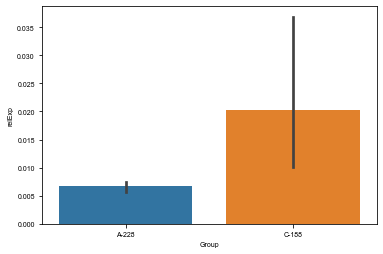

In [8]:
sns.barplot(data=df1_filtered, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

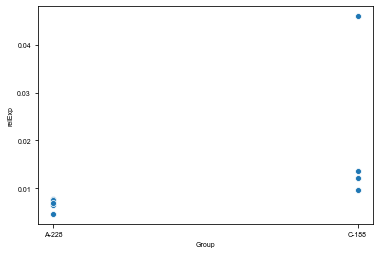

In [9]:
sns.scatterplot(data=df1_filtered, x='Group', y='relExp')

In [10]:
df2 = get_expression_data(df, 'Serpinh1 sg2 v1')

In [11]:
df2

Sample     Cq_ref    Cq_test    deltaCq    relExp  Group
0  A-229-1  19.611648  26.856093   7.244445  0.006595  A-229
1  A-229-2  20.038403  28.255367   8.216964  0.003361  A-229
2  A-229-3  19.155659  26.804868   7.649209  0.004981  A-229
3  A-229-4  19.039850  26.429837   7.389987  0.005962  A-229
4  A-229-5  19.104388  25.973021   6.868633  0.008557  A-229
5  C-188-1  19.580179  24.236578   4.656400  0.039654  C-188
6  C-188-2  25.394857  35.456448  10.061590  0.000936  C-188
7  C-188-3  20.124798  26.754639   6.629842  0.010098  C-188
8  C-188-4  20.347366  26.775186   6.427820  0.011615  C-188
9  C-188-5  20.183725  27.236674   7.052949  0.007531  C-188

In [12]:
df2 = df2[df2.Cq_ref<21]

<AxesSubplot:xlabel='Group', ylabel='relExp'>

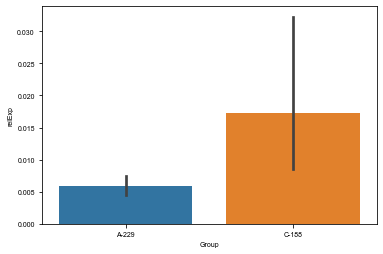

In [13]:
sns.barplot(data=df2, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

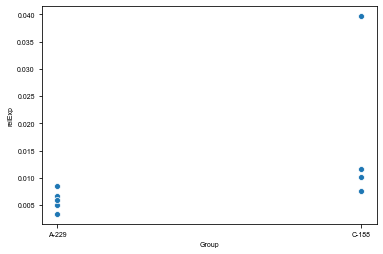

In [14]:
sns.scatterplot(data=df2, x='Group', y='relExp')

In [15]:
df3 = get_expression_data(df, 'Serpinh1 sg3 v1')

In [16]:
df3

Sample     Cq_ref    Cq_test    deltaCq    relExp  Group
0  A-230-1  19.056234  26.020859   6.964624  0.008006  A-230
1  A-230-2  19.255067  27.052493   7.797426  0.004495  A-230
2  A-230-3  19.268028  26.203826   6.935798  0.008168  A-230
3  A-230-4  19.679644  27.102059   7.422415  0.005829  A-230
4  A-230-5  19.226633  26.700885   7.474252  0.005624  A-230
5  C-188-1  19.580179  24.845671   5.265492  0.025997  C-188
6  C-188-2  25.394857  36.440598  11.045740  0.000473  C-188
7  C-188-3  20.124798  27.975943   7.851145  0.004331  C-188
8  C-188-4  20.347366  27.631813   7.284447  0.006415  C-188
9  C-188-5  20.183725  28.183874   8.000149  0.003906  C-188

In [17]:
df3 = df3[df3.Cq_ref<21]

In [18]:
df3

Sample     Cq_ref    Cq_test   deltaCq    relExp  Group
0  A-230-1  19.056234  26.020859  6.964624  0.008006  A-230
1  A-230-2  19.255067  27.052493  7.797426  0.004495  A-230
2  A-230-3  19.268028  26.203826  6.935798  0.008168  A-230
3  A-230-4  19.679644  27.102059  7.422415  0.005829  A-230
4  A-230-5  19.226633  26.700885  7.474252  0.005624  A-230
5  C-188-1  19.580179  24.845671  5.265492  0.025997  C-188
7  C-188-3  20.124798  27.975943  7.851145  0.004331  C-188
8  C-188-4  20.347366  27.631813  7.284447  0.006415  C-188
9  C-188-5  20.183725  28.183874  8.000149  0.003906  C-188

<AxesSubplot:xlabel='Group', ylabel='relExp'>

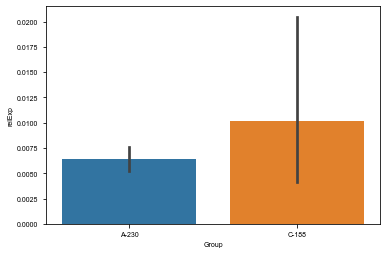

In [19]:
sns.barplot(data=df3, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

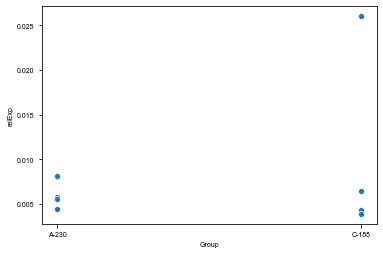

In [20]:
sns.scatterplot(data=df3, x='Group', y='relExp')

In [70]:
# Testing plotting melting curves
def get_melting_curves_data(plate_id, data_folder='../data/qPCR-data'):
    ''' Given a plate id:
          1. Locate the annotation csv file and the melting curves csv file
          2. Extract useful data, merge and return the data frame
    '''
    
    exported_csv_folders = glob.glob(os.path.join(data_folder, '*'+plate_id+'*'+os.path.sep))
    assert len(exported_csv_folders) == 1
    exported_csv_folder = exported_csv_folders[0]
    
    data_files = glob.glob(os.path.join(exported_csv_folder, '*Melt Curve Derivative Results_SYBR.csv'))
    assert len(data_files) == 1
    data_file = data_files[0]
    
    df = pd.read_csv(data_file)
    
    # drop the first column (empty)
    df = df.iloc[:, 1:]
    
    wells = []
    for i in string.ascii_uppercase[:8]:
        for j in range(1,13):
            wells.append(i+'{:02d}'.format(j))
    
    # rename columns to keep the well names consistent
    df.columns = ['Temperature'] + wells
    
    return df

def plot_melting_curves(plate_id, primer,
                        exclude_wells=None,
                        sample=None,
                        data_folder='../data/qPCR-data'):
    '''
    '''
    layout_to_annotation(plate_id)
    annotation_files = glob.glob(os.path.join(data_folder, '*'+plate_id+'*annotation.csv'))
    assert len(annotation_files) == 1
    annotation_file = annotation_files[0]

    df = pd.read_csv(annotation_file)
    df_annotation = df[['Well', 'Sample', 'Primer']]
    
    # select the wells based on the query of primer and sample
    if type(primer) is str:
        df_selected = df_annotation[df_annotation.Primer==primer]
    elif type(primer) is list:
        df_selected = df_annotation[df_annotation.Primer.isin(primer)]
        
    if sample is not None:
        if type(sample) is str:
            df_selected = df_selected[df_selected.Sample==sample]
        elif type(sample) is list:
            df_selected = df_selected[df_selected.Sample.isin(sample)]
    
    df = get_melting_curves_data(plate_id, data_folder)
    for well in df_selected.Well.tolist():
        if exclude_wells is None:
            plt.plot(df.Temperature, df[well])
        elif well not in exclude_wells:
            plt.plot(df.Temperature, df[well])
            

In [58]:
df = get_melting_curves_data('220627-plate2')

In [59]:
df.head()

Temperature       A01       A02       A03        A04        A05        A06  \
0         65.0  1.454877 -3.312484 -3.867710 -11.887255  -5.299782  -8.662307   
1         65.5  3.152232 -7.177048 -8.380039 -25.755720 -11.482861 -18.768333   
2         66.0  2.909753 -6.624967 -7.735421 -23.774510 -10.599564 -17.324615   
3         66.5  2.909753 -6.624967 -7.735421 -23.774510 -10.599564 -17.324615   
4         67.0  2.909753 -6.624967 -7.735421 -23.774510 -10.599564 -17.324615   

         A07        A08        A09  ...       H03       H04        H05  \
0  -5.613364  -5.107449  -6.908295  ... -1.601167 -4.336527  -5.138667   
1 -12.162290 -11.066140 -14.967971  ... -3.469196 -9.395808 -11.133778   
2 -11.226729 -10.214898 -13.816589  ... -3.202335 -8.673054 -10.277334   
3 -11.226729 -10.214898 -13.816589  ... -3.202335 -8.673054 -10.277334   
4 -11.226729 -10.214898 -13.816589  ... -3.202335 -8.673054 -10.277334   

        H06        H07        H08        H09       H10        H11       H12  
0  0.563135  -4.889344  -7.431574  -4.902143 -4.600001  -5.455169  0.600081  
1  1.220126 -10.593579 -16.101744 -10.621310 -9.966669 -11.819533  1.300175  
2  1.126270  -9.778688 -14.863149  -9.804286 -9.200002 -10.910338  1.200161  
3  1.126270  -9.778688 -14.863149  -9.804286 -9.200002 -10.910338  1.200161  
4  1.126270  -9.778688 -14.863149  -9.804286 -9.200002 -10.910338  1.200161  

[5 rows x 97 columns]

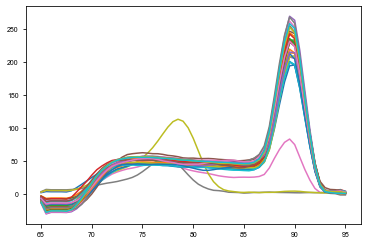

In [72]:
plot_melting_curves('220627-plate2', 'Serpinh1 sg1 v2')
# plot_melting_curves('220627-plate2', 'Serpinh1 sg1 v2', ['B01', 'B02', 'B03'])

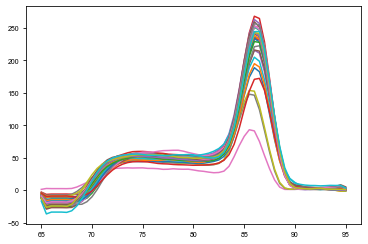

In [76]:
plot_melting_curves('220627-plate2', 'Serpinh1 sg2 v1')
# plot_melting_curves('220627-plate2', 'Serpinh1 sg2 v1', ['B07', 'B08', 'B09'])

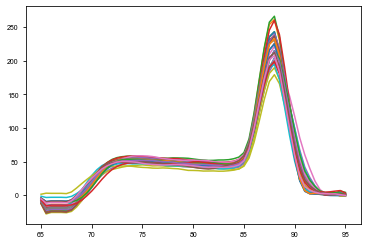

In [78]:
# plot_melting_curves('220627-plate2', 'Serpinh1 sg3 v1')
plot_melting_curves('220627-plate2', 'Serpinh1 sg3 v1', ['F02', 'G02', 'H02'])

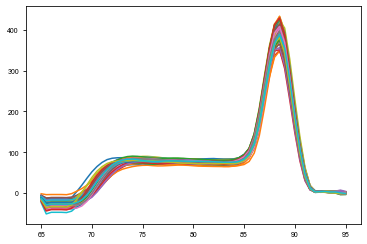

In [79]:
plot_melting_curves('220627-plate3', 'Rps29 v1')

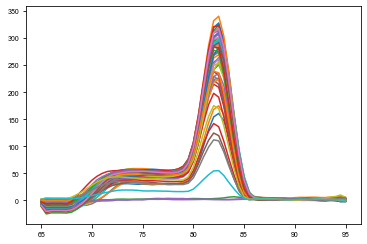

In [80]:
plot_melting_curves('220627-plate4', 'Itga3 v1')

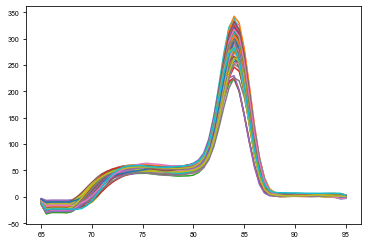

In [81]:
plot_melting_curves('220627-plate5', 'Itga6 v1')

In [82]:
df = get_melting_curves_data('220627-plate4')

In [84]:
df_des = df.describe().transpose()

In [87]:
df_des_selected = df_des[df_des['max']<100]

In [88]:
df_des_selected

count       mean        std        min        25%        50%  \
Temperature   61.0  80.000000   8.876467  65.000000  72.500000  80.000000   
B01           61.0   1.711060   1.937336  -1.837209   0.456968   2.039379   
B03           61.0   0.653266   1.759784  -3.066064   0.462292   1.162438   
C11           61.0   0.654247   2.254326  -3.962630  -1.144113   1.373300   
E12           61.0  12.255502  13.628308   0.289052   2.003677   7.033940   
F01           61.0   0.720347   0.724656  -0.424999   0.261397   0.619465   
F02           61.0   0.686501   0.671821  -0.818053   0.293229   0.702768   
F03           61.0   0.787472   0.697868  -0.496704   0.258107   0.793034   
F04           61.0   0.566426   0.640075  -2.043711   0.338719   0.731239   
F05           61.0   0.700107   0.738857  -0.988836   0.247864   0.597376   
F06           61.0   0.645915   0.631967  -1.185026   0.296818   0.700638   
F07           61.0   0.661001   0.559007  -0.428107   0.308442   0.638809   
F08           61.0   0.709368   0.566463  -0.296655   0.311918   0.689973   
F09           61.0   0.652824   0.423475  -0.217698   0.400527   0.641842   
F10           61.0   0.715905   0.908506  -0.482830   0.155310   0.822236   
F11           61.0   0.685454   1.235386  -5.457471   0.445558   0.856413   
F12           61.0   0.835220   0.861696  -2.524921   0.553880   0.912030   
G01           61.0   0.758042   0.347035  -0.139960   0.469767   0.861287   
G02           61.0   0.613273   0.532701  -0.435503   0.244567   0.614514   
G03           61.0   0.516093   0.470159  -0.628537   0.198821   0.618464   
G04           61.0   0.517548   0.886668  -3.239528   0.165114   0.601408   
G05           61.0   0.597570   0.690431  -1.562021   0.171254   0.691200   
G06           61.0   0.443007   0.491313  -0.458518  -0.046861   0.448467   
G07           61.0   0.287976   1.205645  -5.237489   0.071513   0.468979   
G08           61.0   0.584962   1.030383  -3.920855   0.187295   0.718914   
G09           61.0   0.659778   0.810683  -0.975190   0.165918   0.606456   
G10           61.0   0.550179   0.829769  -1.083386   0.112486   0.656129   
G11           61.0   0.699939   0.871886  -1.639893   0.242779   0.780021   
G12           61.0   0.576238   0.822877  -1.401971  -0.012739   0.490007   
H01           61.0   0.939633   0.427010  -0.200164   0.725733   0.945920   
H02           61.0   1.745947   0.617763   0.365053   1.326390   1.629878   
H03           61.0   0.893254   0.699929  -0.578460   0.343626   0.718207   
H04           61.0   0.684774   0.660998  -0.395916   0.140406   0.628930   
H05           61.0   0.755953   0.558692  -0.504695   0.369753   0.827155   
H06           61.0   0.756519   0.492493  -0.271147   0.483957   0.718693   
H07           61.0   0.620802   0.751569  -2.172218   0.296902   0.617101   
H08           61.0   0.775985   0.690881  -0.540049   0.244361   0.731324   
H09           61.0   1.164374   0.641673  -0.176426   0.654305   0.965485   
H10           61.0   0.852879   0.775337  -1.181931   0.460297   0.807925   
H11           61.0   0.660852   0.841555  -0.977706   0.216480   0.858768   
H12           61.0   0.770440   0.969274  -0.800661   0.032524   0.839839   

                   75%        max  
Temperature  87.500000  95.000000  
B01           2.938694   6.497265  
B03           1.664942   5.157548  
C11           2.261796   4.987240  
E12          17.340363  54.845063  
F01           1.076909   3.946777  
F02           1.061714   2.946124  
F03           1.430756   2.423318  
F04           0.934882   1.645098  
F05           1.114427   2.233724  
F06           1.024416   1.878511  
F07           1.119692   2.404188  
F08           1.062953   2.305359  
F09           0.891159   1.667869  
F10           1.093509   4.855205  
F11           1.468267   2.009888  
F12           1.296520   2.573024  
G01           1.033911   1.471087  
G02           0.960408   1.728149  
G03           0.816709   1.348571  
G04           1.084753